# Simple error bar example

Adapted from BayesianAstronomy.
$% Some LaTeX definitions we'll use.
\newcommand{\pr}{{p}}
$

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn; seaborn.set('talk') # for plot formatting

## The Data

Let's start by creating some data that we will fit with a straight line.  We'll start with a constant standard deviation of $\sigma$ on the $y$ values and no error on $x$.

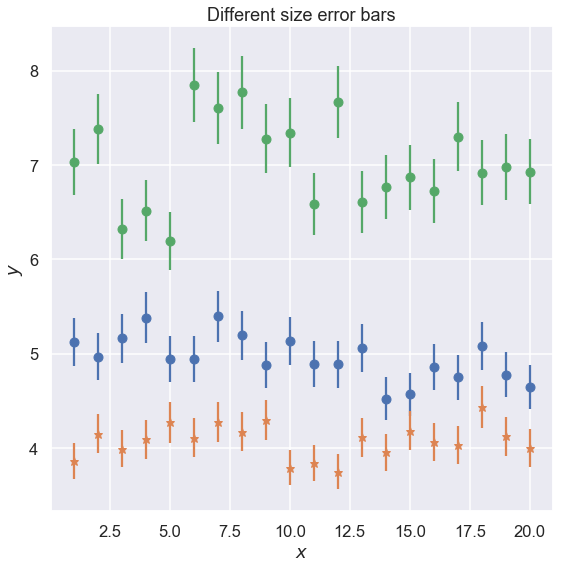

In [17]:
def make_data(intercept, slope, N=20, dy=0.05, rseed=42):
    """Given a straight line defined by intercept and slope:
          y = slope * x + intercept
       generate N points randomly spaced points from x=0 to x=100
       with Gaussian (i.e., normal) error with mean zero and standard
       deviation dy*y, i.e. relative error dy.
       
       Return the x and y arrays and an array of standard deviations.
    """
    rand = np.random.RandomState(rseed) 
    x =  np.linspace(1,20,20)# choose a uniform grid
    y = intercept + slope * x  # This is the y value without noise
    y += dy * y * rand.randn(N)    # Add in Gaussian noise
    return x, y, dy * y * np.ones_like(x)  # return coordinates and error bars

intercept = 5.   # true intercept (called b elsewhere)
slope = 0.       # true slope (called m elsewhere)
theta_true = [intercept, slope]  # put parameters in a true theta vector
x1, y1, dy1 = make_data(*theta_true, rseed=42)
intercept = 4.
theta_true = [intercept, slope]  # put parameters in a true theta vector
x2, y2, dy2 = make_data(*theta_true, rseed=13)
intercept = 7.
theta_true = [intercept, slope]  # put parameters in a true theta vector
x3, y3, dy3 = make_data(*theta_true, rseed=8)



fig, ax = plt.subplots(figsize=(8,8))
ax.errorbar(x1, y1, dy1, fmt='o')
ax.errorbar(x2, y2, dy2, fmt='*')
ax.errorbar(x3, y3, dy3, fmt='o')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
plot_title = rf'Different size error bars'
ax.set_title(plot_title)
fig.tight_layout()

#fig, ax = plt.subplots(1,3,figsize=(20,6))
#ax[0].errorbar(x1, y1, dy1*y1, fmt='o')
#ax[0].set_xlabel(r'$x$')
#ax[0].set_ylabel(r'$y$')
#ax[0].set_title(plot_title1)
